<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Actividad_2_1_1_Observaciones_influyentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejemplo 2_4:** Determinación de observaciones influyentes: método de jackknife

---
# *Jesús Roque Armas Martín - Basado en cuaderno de Salvador Bordón*




**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un vecindario. Supongamos que hay un vecino con unos ingresos signficativamente altos.



In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15058.72962658, 15128.70120548, 15275.25435165, 15294.55080328,
       15425.45136892, 15592.34729641, 15847.45136357, 16019.43367118,
       16066.41005046, 16147.35523957, 16374.0816629 , 16389.49029444,
       16408.29832054, 16561.63029593, 16778.0218583 , 16965.77869914,
       17223.45217096, 17229.96357732, 17273.79420441, 17279.36203353,
       17562.93971677, 17564.00792872, 17680.1334326 , 17748.03316926,
       17815.46020951, 17870.55534582, 17898.86012772, 17972.27390704,
       17987.47408579, 18034.90237685, 18055.19600058, 18107.28550597,
       18109.63575652, 18162.88321127, 18169.64958097, 18169.8813614 ,
       18190.30745442, 18463.01854291, 18729.38670544, 18750.29049792,
       18857.07323723, 19096.04799659, 19132.99131008, 19257.83206131,
       19335.23127177, 19408.60261566, 19451.12331101, 19539.3593117 ,
       19609.07608158, 19636.69044456, 19777.68095887, 19804.0734474 ,
       19815.87782893, 19823.05798339, 19903.69199391, 19968.60688663,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [ ]:
media=  np.mean(datos)
mediana=  np.median (datos)
print(f" Media= {media} y Mediana={mediana} (Antes)")
# El vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

 Media= 24578.073980922 y Mediana=19720.38194597981 (Antes)


array([ 15058.72962658,  15128.70120548,  15275.25435165,  15294.55080328,
        15425.45136892,  15592.34729641,  15847.45136357,  16019.43367118,
        16066.41005046,  16147.35523957,  16374.0816629 ,  16389.49029444,
        16408.29832054,  16561.63029593,  16778.0218583 ,  16965.77869914,
        17223.45217096,  17229.96357732,  17273.79420441,  17279.36203353,
        17562.93971677,  17564.00792872,  17680.1334326 ,  17748.03316926,
        17815.46020951,  17870.55534582,  17898.86012772,  17972.27390704,
        17987.47408579,  18034.90237685,  18055.19600058,  18107.28550597,
        18109.63575652,  18162.88321127,  18169.64958097,  18169.8813614 ,
        18190.30745442,  18463.01854291,  18729.38670544,  18750.29049792,
        18857.07323723,  19096.04799659,  19132.99131008,  19257.83206131,
        19335.23127177,  19408.60261566,  19451.12331101,  19539.3593117 ,
        19609.07608158,  19636.69044456, 500000.        ,  19804.0734474 ,
        19815.87782893,  

Cálculo de media y mediana en toda la muestra

In [ ]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 24772.172781089917 y Mediana=20194.9735196057


Notar que los ingresos del barrio son aprox. 20000 euros. El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

In [ ]:
# Insertar el código aquí
Data = pd.DataFrame(datos, columns=['Ingresos'])
Data.describe()

,Ingresos
count,100.000000
mean,24772.172781
std,48090.973211
min,15000.178815
25%,17416.501118
50%,20194.973520
75%,22325.942032
max,500000.000000


**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

Dicho código obedece a la fórmula:
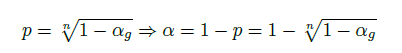

In [ ]:
# Insertar el código aquí
import scipy.stats as st
# PROBABILIDAD GLOBAL - Preprocesamiento
# Asumiendo que las variables tienen una distribución normal.
# Probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global
alfa_g=(1-p_g)/2
# probabilidad  para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos)) # Se realiza este ajuste para ser más precisos.
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)
print(f" Alfa ={alfa}")
print(f" Z_alfa ={Z_alfa}")

xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Alfa =0.00025
 Z_alfa =3.65906
 Banda= [ -150313.5342,199857.8798]


Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [ ]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

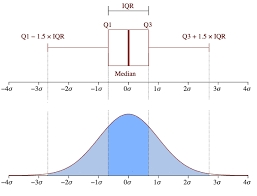

In [ ]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [ ]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,25286.177993
std,485.344085
min,20491.088882
25%,25305.445369
50%,25333.136040
75%,25360.149841
max,25389.093491


**Ejercicio**: Repetir el mismo procedimiento (método Jackknife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?

In [ ]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.median(datos_sin_i)
phi

array([19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19804.0734474 , 19804.0734474 ,
       19804.0734474 , 19804.0734474 , 19636.69044456, 19636.69044456,
       19636.69044456, 19636.69044456, 19636.69044456, 19636.69044456,
      

In [ ]:
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
print (xL,xU)
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

19385.61594029991 20055.14795165971
